We assume that you have completed the first part of `LAB140 - Learn how to build a modern data stack in an hour ` - Data Integration, which involved creating your first lakehouse using Copy Data, as well as copying the data to the `nyc_taxi` table. 

[Sharing a link to the data used in the lab.](https://github.com/ekote/azure-architect#:~:text=part%2D00175%2Dtid%2D4753095944193949832%2Dfee7e113%2D666d%2D4114%2D9fcb%2Dbcd3046479f3%2D2745%2D1.c000.parquet)

# 1. Access the lakehouse

The foundation of Microsoft Fabric is a Lakehouse, which is built on top of the OneLake scalable storage layer and uses Apache Spark and SQL compute engines for big data processing. A Lakehouse is a unified platform that combines:
- The flexible and scalable storage of a data lake
- The ability to query and analyze data of a data warehouse


Imagine your company has been storing structured data from NYC Taxi's transactional system, such as trip history, passenger counts, and fare information in a data warehouse. However, you have also collected unstructured data from social media, website logs, and third-party sources related to NYC Taxi, which are difficult to manage and analyze using the existing data warehouse infrastructure.

Your company's new directive is to improve its decision-making capabilities by analyzing data in various formats across multiple sources. Therefore, the company decides to leverage Microsoft Fabric's capabilities to analyze and manage these diverse datasets more efficiently.

**Let's discover the lakehouse!**

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>


![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/lakehouse_overview.gif?raw=true)


# 2. Lakehouse artifact overview

A Lakehouse presents as a database and is built on top of a data lake using Delta Lake files and tables. Lakehouses combine the SQL-based analytical capabilities of a relational data warehouse and the flexibility and scalability of a data lake. Lakehouses store all data formats and can be used with various analytics tools and programming languages. As cloud-based solutions, lakehouses can scale automatically and provide high availability and disaster recovery.

Some benefits of a lakehouse include:
- Lakehouses use Spark and SQL engines to process large-scale data and support machine learning or predictive modeling analytics.
- Lakehouse data is organized in a schema-on-read format, which means you define the schema as needed rather than having a predefined schema.
- Lakehouses support ACID (Atomicity, Consistency, Isolation, Durability) transactions through Delta Lake formatted tables for data consistency and integrity.
- Lakehouses are a single location for data engineers, data scientists, and data analysts to access and use data.

A Lakehouse is a great option if you want a scalable analytics solution that maintains data consistency. 



<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>


![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/2_30frames.gif?raw=true)

# 3. Get data from the lakehouse


The most common way to work with data in delta tables in Spark is to use Spark SQL. You can embed SQL statements in other languages (such as PySpark or Scala) by using the spark.sql library.

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>

![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/3.gif?raw=true)


There are three ways to access Lakehouse data in your notebook:

* Using a relative path to the default Lakehouse, as shown in the code example.
* Using the full ABFS (Azure Blob File System) path.
* Using the syntax "/lakehousename/path", which is only valid when accessing a Lakehouse within the same workspace.




`df = spark.sql("SELECT * FROM lab140lakehouse.nyc_taxi LIMIT 1000")` - This line of code uses the `spark.sql()` function to run an SQL query on a table called `nyc_taxi` located in the lakehouse `lab140lakehouse`. The query selects all columns `(*)` from the table and limits the result to the first 1000 rows with the `LIMIT 1000` clause. The result of the query is then stored in a PySpark DataFrame called `df`.

`display(df)` - the `display()` function is used to visualize the contents of a DataFrame in a tabular format. In this case, it visualizes the contents of the df DataFrame created in the previous line.

In [5]:
df = spark.sql("SELECT * FROM lab140lakehouse.nyc_taxi LIMIT 1000")

display(df)

StatementMeta(, 5e53f828-07b6-4731-8cf8-c85fd3a8ae1b, 7, Finished, Available)

SynapseWidget(Synapse.DataFrame, 7f5c0a14-6a5c-479a-af36-d20ad31ee048)

Alternatively, you can use the %%sql magic in a notebook to run SQL statements.

In [ ]:
%%sql
SELECT * FROM lab140lakehouse.nyc_taxi LIMIT 1000

StatementMeta(, , , Waiting, )

<Spark SQL result set with 1000 rows and 25 fields>

The output of `df.printSchema()` displays the name of each column in the DataFrame, the data type of each column, and whether null values are allowed. This information can be useful for understanding the structure of the data in the DataFrame, and for performing operations on the data.

In [6]:
df.printSchema()

StatementMeta(, 5e53f828-07b6-4731-8cf8-c85fd3a8ae1b, 8, Finished, Available)

root
 |-- vendorID: integer (nullable = true)
 |-- lpepPickupDatetime: timestamp (nullable = true)
 |-- lpepDropoffDatetime: timestamp (nullable = true)
 |-- passengerCount: integer (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: string (nullable = true)
 |-- doLocationId: string (nullable = true)
 |-- pickupLongitude: double (nullable = true)
 |-- pickupLatitude: double (nullable = true)
 |-- dropoffLongitude: double (nullable = true)
 |-- dropoffLatitude: double (nullable = true)
 |-- rateCodeID: integer (nullable = true)
 |-- storeAndFwdFlag: string (nullable = true)
 |-- paymentType: integer (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: string (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- ehailFee: double (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- tripT

The code `df.show(5)` is used to display the first five rows of a DataFrame called df. This is a useful function when working with large datasets to quickly inspect the data and ensure that it has been loaded correctly. The number inside the parenthesis specifies the number of rows to display. In this case, the function call displays the first five rows of the DataFrame `df`. Each row is displayed as a separate line and the columns are separated by vertical bars.

In [7]:
df.select("vendorID", "tripDistance", "fareAmount", "tipAmount").show(5)

StatementMeta(, 5e53f828-07b6-4731-8cf8-c85fd3a8ae1b, 9, Finished, Available)

+--------+------------+----------+---------+
|vendorID|tripDistance|fareAmount|tipAmount|
+--------+------------+----------+---------+
|       2|         5.5|      35.0|      4.0|
|       2|        3.32|      12.0|      2.0|
|       2|       16.14|      48.0|     10.1|
|       2|         0.0|      52.0|     1.04|
|       2|       13.22|      74.0|    11.88|
+--------+------------+----------+---------+
only showing top 5 rows



When working with data, one of the initial tasks is to read it into the environment for analysis. Once the data is loaded, basic analysis such as filtering, sorting, and aggregating can be performed. However, as the scale and complexity of the data increase, there is a need for more advanced data engineering scenarios such as data cleansing, transformation, and aggregation. 

# 4. Data aggregation, summarization and correlation

In this scenario, the data engineer could aggregate and summarize the data to provide insights into the overall trends and patterns in the dataset. For example, they could group the data by some columns (such as VendorID or RatecodeID) and calculate some summary statistics for the numerical columns (such as average fare_amount or total trip_distance). This could involve using Spark's built-in aggregation functions (such as groupBy and agg) to perform these calculations.

The code calculates the average fare amount per month by grouping the DataFrame df by year and month of the lpep_pickup_datetime column. It uses the avg function from the [pyspark.sql.functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html) module to calculate the average fare amount and aliases the resulting column as "average_fare". The resulting DataFrame average_fare_per_month is sorted by year and month and is displayed using the display function. Finally, the code saves the results to a new delta table named "average_fare_per_month" using the write function with "delta" format, and "overwrite" mode.

In [9]:
from pyspark.sql.functions import col, year, month, dayofmonth, avg

df = spark.read.table("nyc_taxi")

# Calculate average fare amount per month
average_fare_per_month = (
    df
    .groupBy(year("lpepPickupDatetime").alias("year"), month("lpepPickupDatetime").alias("month"))
    .agg(avg("fareAmount").alias("average_fare"))
    .orderBy("year", "month")
)
display(average_fare_per_month)

# Save the results to a new delta table
average_fare_per_month.write.format("delta").mode("overwrite").saveAsTable("average_fare_per_month")

StatementMeta(, 5e53f828-07b6-4731-8cf8-c85fd3a8ae1b, 11, Finished, Available)

SynapseWidget(Synapse.DataFrame, c9a317f0-d259-4f6a-86bf-1daa30434eee)

## Refresh Lakehouse explorer

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>

![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/new_table_refresh.gif?raw=true)

The code calculates the average fare amount per day by grouping the DataFrame df by year and month and day of the lpep_pickup_datetime column. It uses the avg function from the pyspark.sql.functions module to calculate the average fare amount and aliases the resulting column as "average_fare". The resulting DataFrame average_fare_per_day is sorted by year and month and is displayed using the display function. Finally, the code saves the results to a new delta table named "average_fare_per_day" using the write function with "delta" format, and "overwrite" mode.

In [10]:
from pyspark.sql.functions import col, year, month, dayofmonth, avg

# Calculate average fare amount per day
average_fare_per_day = (
    df
    .groupBy(year("lpepPickupDatetime").alias("year"), month("lpepPickupDatetime").alias("month"), dayofmonth("lpepPickupDatetime").alias("day"))
    .agg(avg("fareAmount").alias("average_fare"))
    .orderBy("year", "month", "day")
)
display(average_fare_per_day)

StatementMeta(, 5e53f828-07b6-4731-8cf8-c85fd3a8ae1b, 12, Finished, Available)

SynapseWidget(Synapse.DataFrame, 2788ad45-9c66-4c96-81c7-360c7f47ee96)

In [ ]:
# Save the results to a new delta table
average_fare_per_day.write.format("delta").mode("overwrite").saveAsTable("average_fare_per_day")

## Scatter chart

This code snippet demonstrates how to create a scatter plot using Matplotlib in Python. The code assumes that the Spark DataFrame df contains the columns fare_amount and trip_distance. First, the Spark DataFrame is converted to a Pandas DataFrame using the toPandas() function. Then, a scatter plot is created using ax.scatter() function. The x and y arguments of the scatter() function represent the variables to be plotted on the x- and y-axes, respectively. The alpha argument controls the transparency of the points in the scatter plot. The axis labels and title are set using the ax.set_xlabel(), ax.set_ylabel(), and ax.set_title() functions. Finally, the plot is displayed using the plt.show() function. This code can be used to visualize the correlation between fare amount and trip distance in the DataFrame.


In [ ]:
import matplotlib.pyplot as plt

# convert Spark DataFrame to Pandas DataFrame
df_pd = df.select(['fareAmount', 'tripDistance']).toPandas()

# create scatter plot
fig, ax = plt.subplots()
ax.scatter(x=df_pd['tripDistance'], y=df_pd['fareAmount'], alpha=0.5)

# set axis labels and title
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Fare Amount')
ax.set_title('Correlation between Fare Amount and Trip Distance')

# show the plot
plt.show()


StatementMeta(, , , Waiting, )

# 5. Custom libraries & advanced visualisation

Libraries provide reusable code that Data Engineers may want to include in their Spark application.

Each workspace comes with a pre-installed set of libraries available in the Spark run-time and available to be used immediately in the notebook or Spark job definition. 

Based on the user scenarios and specific needs, you can include other libraries. There are two types of libraries you may want to include:

- Feed library: Feed libraries are the ones that come from public sources or repositories. You can install Python feed libraries from PyPI and Conda by specifying the source in the Library Management portals. You can also use a Conda environment specification .yml file to install libraries.

- Custom library: Custom libraries are the code built by you or your organization. .whl, .jar and .tar.gz can be managed through Library Management portals. Note that .tar.gz is only supported for R language, please use .whl for Python custom libraries.

| **Library name** | **Workspace update** | **In-line installation** |
|---|---|---|
| **Python Feed (PyPI & Conda)** | Supported | Supported |
| **Python Custom (.whl)** | Supported | Supported |
| **R Feed (CRAN)** | Not Supported | Supported |
| **R custom (.tar.gz)** | Supported | Supported |
| **Jar** | Supported | Not Supported |

## Install library

The code line `pip install altair` is used to install the Python package "Altair" via the package manager "pip". Altair is a library for creating interactive visualizations in Python.

"Pip" is a package manager for Python that allows users to easily install, manage, and update Python packages (libraries) from the Python Package Index (PyPI) and other package repositories. Pip can be used to install packages globally on the system or locally in a specific virtual environment.



In [13]:
pip install altair

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 15, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 6.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Create custom visualisation with a new library

First, the code imports the Altair library using the alias "alt". Next, the code uses Spark SQL to select all columns from the "nyc_taxi_cleansed" table in the "lab140lakehouse" database, limiting the result to the first 5000 rows. The resulting DataFrame is then converted to a Pandas DataFrame using the toPandas method.

The alt.Chart method is then called with the Pandas DataFrame as the data source, and the mark_point method is used to specify that the chart should use points as the visual mark. The encode method is then used to specify the encoding for the x-axis, y-axis, and color of the points, as well as the tooltip values. The x-axis is mapped to the "tripDistance" column, the y-axis is mapped to the "fareAmount" column, and the color of the points is mapped to the "paymentType" column, which is treated as a categorical variable. The tooltip displays the "tripDistance", "fareAmount", and "paymentType" columns for each point.

Finally, the interactive method is called to enable interactivity in the resulting visualization, allowing the user to zoom, pan, and view tooltip information when hovering over points in the scatter plot.

In [14]:
import altair as alt

df = spark.sql("SELECT * FROM lab140lakehouse.nyc_taxi LIMIT 5000")

data = df.toPandas()

alt.Chart(data).mark_point().encode(
    x='tripDistance',
    y='fareAmount',
    color='paymentType:N',
    tooltip=['tripDistance', 'fareAmount', 'paymentType']
).interactive()

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 16, Finished, Available)

alt.Chart(...)

First, the code creates an Altair Chart object using the alt.Chart method, with the data variable as the input data source. The mark_rect method is then used to specify that the chart should use rectangles to represent each bin in the heatmap.

The encode method is then used to specify the encoding for the x-axis, y-axis, color, and column of the heatmap. The x-axis is mapped to the "tripDistance" column and is binned using the bin=True argument. The y-axis is mapped to the "fareAmount" column and is also binned using bin=True. The color of each bin is mapped to the count of data points within that bin using the count() method. Finally, the column argument is used to split the heatmap into separate columns based on the "paymentType" column, which is treated as a categorical variable.

Finally, the interactive method is called to enable interactivity in the resulting visualization, allowing the user to zoom, pan, and view tooltip information when hovering over each bin in the heatmap.

In [15]:
alt.Chart(data).mark_rect().encode(
    alt.X('tripDistance:Q', bin=True),
    alt.Y('fareAmount:Q', bin=True),
    color='count()',
    column='paymentType:N'
).interactive()


StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 17, Finished, Available)

alt.Chart(...)

# 6. Shortcuts and final table 

Shortcuts in a lakehouse allow users to reference data without copying it. It unifies data from different lakehouses, workspaces, or external storage, such as ADLS Gen2 or AWS S3. You can quickly make large amounts of data available in your lakehouse locally without the latency of copying data from the source.


## Create shortcut to external ADLS Gen2

To create a shortcut, open Lakehouse Explorer and select where to place the shortcut under Tables or Files. Creating a shortcut to Delta formatted table under Tables in Lakehouse Explorer will automatically register it as a table, enabling data access through Spark, SQL endpoint, and default dataset. Spark can access shortcuts in Files for data science projects or for transformation into structured data.

**Objective: In this step, we aim to merge two datasets: the `nyc_taxi` delta table that currently resides in our lakehouse, and an external dataset located in ADLS Gen 2 that contains information about discounts offered on specific days. The final table will reflect all records from the `nyc_taxi` dataset with an additional column from the discount dataset, allowing us to see the total discount value per vendor for a given day. This will enable us to gain insights into how vendors offer discounts and how it impacts their revenue.**

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>

![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/shortcut.gif?raw=true)


Connection settings:
- URL: `https://buildlab140ekot.dfs.core.windows.net/`
- Connection: Create new connection
- Connection name: NewConnectionToADLS
- Authentication kind: `Shared Access Signature (SAS)`
- SAS token: `?sv=2022-11-02&ss=bfqt&srt=sco&sp=rwlacupx&se=2023-06-01T10:49:05Z&st=2023-05-04T02:49:05Z&spr=https,http&sig=0e0%2BlbFhxx3lcyz79VF272PLEzd0UdyMD348iNvBvQQ%3D`


**If you encounter the error message "The specified connection name already exists. Try choosing a different name", please make sure that the name you choose for the connection is unique.**

Then, for Shortcut settings:
- Name: `SideLoadingDiscountsData`
- URL: confirm it's `https://buildlab140ekot.dfs.core.windows.net/`
- Sub Path `/data`

## Load new data

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>


![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/new_data_shortcut.gif?raw=true)

In [1]:
df = spark.read.format("csv").option("header","true").load("Files/SideLoadingDiscountsData/Generated-NYC-Taxi-Green-Discounts.csv")
# df now is a Spark DataFrame containing CSV data from "Files/SideLoadingDiscountsData/Generated-NYC-Taxi-Green-Discounts.csv".
display(df)

StatementMeta(, 207bb17c-ca33-4d73-a9d1-9f4c7e628585, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 08a98af4-6018-4c4c-bdcb-9673ee982e36)

## Unpivot sideloaded data

The import pandas as pd line imports the Pandas library and assigns it an alias pd.

Melt the discounts DataFrame: The pd.melt() function is used to convert the discouts_df PySpark DataFrame to a long format by converting date columns into rows. First, discouts_df.toPandas() is used to convert the PySpark DataFrame to a Pandas DataFrame. Then, pd.melt() takes the Pandas DataFrame, uses 'VendorID' as the identifier variable (id_vars), sets the 'date' as the variable name (var_name), and 'discount' as the value name (value_name). The melted DataFrame is stored in discouts_pd_df.

Convert the melted DataFrame to a PySpark DataFrame: The spark.createDataFrame() function is used to convert the melted Pandas DataFrame discouts_pd_df back to a PySpark DataFrame, which is stored in the discounts_spark_df variable.

In [2]:
import pandas as pd

# Melt discouts_df to long format
discouts_pd_df = pd.melt(df.toPandas(), id_vars=['VendorID'], var_name='date', value_name='discount')

discounts_spark_df = spark.createDataFrame(discouts_pd_df)

display(discounts_spark_df)

StatementMeta(, 207bb17c-ca33-4d73-a9d1-9f4c7e628585, 4, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


SynapseWidget(Synapse.DataFrame, b2288538-88db-48f0-ac42-fa87ea0ae2be)

## Prepare data for join

In [3]:
from pyspark.sql.functions import to_date

nyc_taxi_df = spark.sql("SELECT * FROM lab140lakehouse.nyc_taxi")

nyc_taxi_df = nyc_taxi_df.withColumn("date", to_date("lpepPickupDatetime"))

display(nyc_taxi_df)

StatementMeta(, 207bb17c-ca33-4d73-a9d1-9f4c7e628585, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, 87dbc56a-4522-4a54-afd8-5d219569553f)

## Join two datasets and save result

In [5]:
from pyspark.sql.functions import col

# Create aliases for your DataFrames
df1_alias = nyc_taxi_df.alias("df1")
df2_alias = discounts_spark_df.alias("df2")

# Define the join condition using the aliases
join_condition = [col("df1.vendorID") == col("df2.VendorID"), col("df1.date") == col("df2.date")]

# Perform the join using the aliases
result_df = df1_alias.join(df2_alias, join_condition, how='inner')  # You can use other join types like 'left', 'right', 'outer', etc.

# Select only the desired columns
result_df = result_df.select("df1.vendorID", "df1.lpepPickupDatetime", "df2.discount")

display(result_df)

# Save the results to a new delta table
result_df.write.format("delta").mode("overwrite").saveAsTable("nyc_taxi_with_discounts")

StatementMeta(, 207bb17c-ca33-4d73-a9d1-9f4c7e628585, 7, Finished, Available)

SynapseWidget(Synapse.DataFrame, ec87efb6-5f65-4017-9262-20c9a8efa3a7)

## Refresh Lakehouse explorer  

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>

![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/results.gif?raw=true)

# [EXTRA] Data cleaning and transformation

In this scenario, the data engineer could perform some data cleaning and transformation tasks to prepare the data for downstream analysis. 

Objective: **Cleanse the data and filter out invalid records for further analysis.**

In this scenario, we aim to demonstrate how data engineers can perform data cleansing and filtering on a large dataset. We begin by loading the data from the source and then filter out records where the trip distance and fare amount are less than or equal to zero, which are invalid records.

Next, we cleanse the data by converting the `store_and_fwd_flag` column to a boolean type, and converting the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns to timestamp types. Finally, we write the cleansed data to the destination in the parquet format.

This scenario demonstrates the importance of data cleansing and filtering to ensure the data is accurate and valid before proceeding with further analysis.

In [4]:
from pyspark.sql.functions import col, when

# Load data from source
df = spark.read.load("Tables/nyc_taxi", header=True, inferSchema=True)
df_count = df.count()

# Remove invalid records
df = df.filter((col("tripDistance") > 0) & (col("fareAmount") > 0))
df_count_after_clearning = df.count()

number_of_deleted_records = df_count - df_count_after_clearning

print(f"Removed {number_of_deleted_records} records")

# # Cleanse data
df = df.withColumn("storeAndFwdFlag", when(col("storeAndFwdFlag") == "Y", True).otherwise(False))
df = df.withColumn("lpepPickupDatetime", col("lpepPickupDatetime").cast("timestamp"))
df = df.withColumn("lpepDropoffDatetime", col("lpepDropoffDatetime").cast("timestamp"))

# Display cleansed data to destination
display(df)

# Write cleansed data to destination
df.write.format("delta").mode("overwrite").saveAsTable("nyc_taxi_cleansed")

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 6, Finished, Available)

Removed 28702 records


SynapseWidget(Synapse.DataFrame, b08145bb-e7d7-415e-86e3-f49ef09c6b01)

### Remember to refresh lakehouse (Lakehouse explorer on the left) to see the new Delta table

<!-- ![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/4.gif?raw=true) -->

# [EXTRA] Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is a common scenario for data engineers. EDA is the process of analyzing and understanding data to gain insights, identify patterns, and develop hypotheses for further investigation. In data engineering, EDA is often done to identify data quality issues, anomalies, or other problems that need to be addressed before data can be used for analysis or modeling. EDA can also help data engineers to understand the relationships between different data sources and determine the best way to join or transform them.

`df.count()` is a Spark DataFrame API function that returns the number of rows in the DataFrame. It is a convenient way to quickly determine the size of the DataFrame without having to iterate over all the rows manually. The function is an action in Spark, meaning it triggers a computation that counts the number of rows in the DataFrame and returns the result. It is useful for getting a quick overview of the data size and checking if any rows are missing or dropped during data processing. However, it should be used with caution on large datasets, as it can be a costly operation that requires significant computational resources.

In [5]:
# Load data from source
df = spark.read.load("Tables/nyc_taxi_cleansed", header=True, inferSchema=True)

# Count the number of rows 
df.count()

# to simple - to remove

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 7, Finished, Available)

2959598

`df.dtypes` is an attribute of a DataFrame object that returns a list of tuples containing the column names and their corresponding data types. The data types are represented using the Spark SQL DataType class, which is a set of classes for representing data types in Spark SQL.

In [6]:
# Display the data types of the columns.

df.dtypes

# to simple - to remove

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 8, Finished, Available)

[('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'string'),
 ('doLocationId', 'string'),
 ('pickupLongitude', 'double'),
 ('pickupLatitude', 'double'),
 ('dropoffLongitude', 'double'),
 ('dropoffLatitude', 'double'),
 ('rateCodeID', 'int'),
 ('storeAndFwdFlag', 'boolean'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'string'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('ehailFee', 'double'),
 ('totalAmount', 'double'),
 ('tripType', 'int'),
 ('puYear', 'string'),
 ('puMonth', 'string')]

The code imports the col function from `pyspark.sql.functions` and uses it to select the `"vendorID"` column from the Spark DataFrame `df`. The `groupBy()` function is then called on the resulting column object to group the DataFrame by the distinct values in the `"vendorID"` column. The `count()` function is then applied to the resulting grouped DataFrame to calculate the number of records in each group. Finally, the `show()` function is used to display the resulting DataFrame on the console.

In [7]:
# Group the data by 'VendorID' and count the number of rows in each group. 

from pyspark.sql.functions import col

df.groupBy(col("vendorID")).count().show()

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 9, Finished, Available)

+--------+-------+
|vendorID|  count|
+--------+-------+
|       1| 653016|
|       2|2306582|
+--------+-------+



The code reads the Spark DataFrame `df` which contains information about NYC taxi trips. The code uses the `'min'` and `'max'` functions from PySpark to select the earliest and latest pickup dates respectively. These dates are stored in the variables `'oldest_day'` and `'latest_day'`. The `'collect'` function is then used to retrieve these values and they are printed to the console using the `'print'` function. The output displays the earliest and latest pickup dates in the dataset.

In [8]:
# Retrieve information about the earliest and latest pickup dates in the dataset.

from pyspark.sql.functions import min, max

oldest_day = df.select(min("lpepPickupDatetime")).collect()[0][0]
latest_day = df.select(max("lpepDropoffDatetime")).collect()[0][0]

print("Oldest pickup date: ", oldest_day)
print("Latest pickup date: ", latest_day)

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 10, Finished, Available)

Oldest pickup date:  2015-01-01 00:00:00
Latest pickup date:  2015-02-01 23:48:50


This code uses the PySpark `date_format` function to group the `df` DataFrame by the year, month, and day of the `lpep_pickup_datetime` column, and then counts the number of occurrences for each date.

`date_format` is a PySpark SQL function used to format the date or timestamp column to the specified format. In this code, the format used is `yyyy-MM-dd`. The alias `pickup_date` is assigned to the formatted date column, and the DataFrame is grouped by this column using the `groupby()` method. The `count()` method is then applied to count the number of occurrences of each pickup_date. Finally, the result is displayed using the `show()` method.

In [9]:
from pyspark.sql.functions import date_format

# group by year, month and day of lpepPickupDatetime
df_grouped = df.groupby(date_format('lpepPickupDatetime', 'yyyy-MM-dd').alias('pickup_date')).count()

# show the result
df_grouped.show()

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 11, Finished, Available)

+-----------+------+
|pickup_date| count|
+-----------+------+
| 2015-01-21| 84812|
| 2015-01-18|108382|
| 2015-01-10|126466|
| 2015-01-26| 58394|
| 2015-01-24|115414|
| 2015-01-30|123676|
| 2015-01-08| 93608|
| 2015-01-29| 93972|
| 2015-01-31|139170|
| 2015-01-23|107756|
| 2015-01-17|127050|
| 2015-01-02| 84608|
| 2015-01-25|104286|
| 2015-01-28| 83266|
| 2015-01-03|105836|
| 2015-01-01|123804|
| 2015-01-27| 30166|
| 2015-01-15| 93910|
| 2015-01-16|117542|
| 2015-01-11| 99118|
+-----------+------+
only showing top 20 rows



This code computes the minimum and maximum values of the fare_amount column in the Spark DataFrame df. It uses the `min()` and `max()` functions from the `pyspark.sql.functions` module to compute the minimum and maximum values, respectively. The `alias()` method is used to rename the resulting columns as `"min"` and `"max"`. Finally, the `show()` method is used to display the resulting DataFrame with two columns `"min"` and `"max"`, showing the minimum and maximum values of the `fare_amount column`.

In [ ]:
# min max values of target feature "fare_amount"

df.select(min('fareAmount').alias('min'), max('fareAmount').alias('max')).show()

This code is performing descriptive statistical analysis on the `"fare_amount"` column of a Spark DataFrame named `"df"`. Specifically, it is using the `describe()` method of the DataFrame to compute summary statistics including `count`, `mean`, `standard deviation`, `minimum`, and `maximum`.

The result of `describe()` is then converted to a Pandas DataFrame using the `toPandas()` method. This allows the statistics to be displayed in a more user-friendly table format, which includes the same summary statistics along with the 25th, 50th, and 75th percentiles. The resulting table provides insights into the central tendency and dispersion of the `"fare_amount"` variable, and can be useful for understanding the distribution of the data and identifying potential outliers.

In [ ]:
# General statistical characteristics of fare amount

df.select('fareAmount').describe().toPandas()

This code computes the approximate quantiles of the `'fare_amount'` column of the DataFrame `'df'` using the `'approxQuantile'` function from PySpark's SQL functions module. The function takes three arguments - the name of the column for which quantiles are to be computed, the list of quantile values to be returned, and a relative error value. In this case, the quantiles are 0.1, 0.25, 0.5, 0.75, and 0.9, and the relative error is set to 0.01. The function returns an array of approximate quantile values for the given column and quantile values.

In [ ]:
# quantiles

df.select('fareAmount').approxQuantile("fareAmount",[0.1, 0.25, 0.5, 0.75, 0.9], 0.01)

This code is used to plot the distribution of fare_amount using matplotlib library in Python. The fare_amount data is first extracted from the Spark DataFrame using the select function along with the F.col() function to extract the fare_amount column. The resulting DataFrame is then converted to a Pandas DataFrame using the toPandas() function. The fare_amount data is then plotted as a histogram using the hist() function from matplotlib. The number of bins for the histogram is set to 50 using the bins parameter. Finally, the title and axis labels for the plot are set using the title(), xlabel(), and ylabel() functions, and the plot is displayed using the show() function.

StatementMeta(, dcaf7af8-c76c-41a3-a3e8-f95d0aeccec0, 12, Finished, Available)

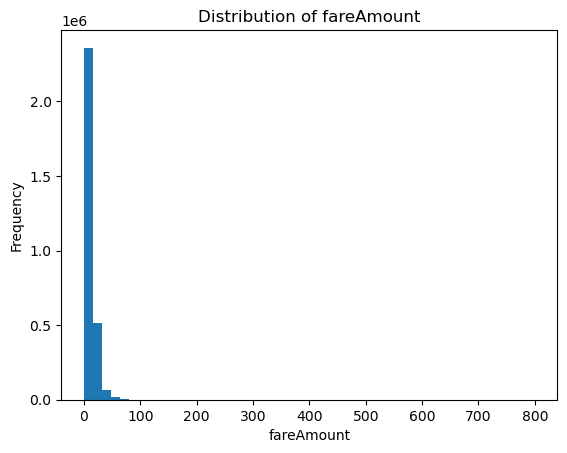

In [10]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Assuming your DataFrame is named `df`
fare_distribution = df.select(F.col('fareAmount')).toPandas()

# Plot histogram
plt.hist(fare_distribution, bins=50)
plt.title('Distribution of fareAmount')
plt.xlabel('fareAmount')
plt.ylabel('Frequency')
plt.show()

# [EXTRA] Medallion architecture

A Medallion architecture is a data design pattern used to organize data in a Lakehouse, with the goal of progressively improving the quality and structure of the data as it flows through each layer of the architecture, starting from the Bronze layer, then to the Silver layer, and finally to the Gold layer.

![image-alt-text](https://techcommunity.microsoft.com/t5/image/serverpage/image-id/243714iAF59794D11862CC4/image-dimensions/521x259?v=v2)

This incremental and progressive improvement enables you to maintain data quality and structure while also improving data processing performance. Medallion architectures are sometimes referred to as "multi-hop" architectures because data flows through multiple layers.

One of the main benefits of a Lakehouse architecture is that it provides a simple data model that is easy to understand and implement. Additionally, it enables incremental ETL (extract, transform, load) operations, which means you can add new data to the Lakehouse in a scalable and manageable way.

Another benefit of a Lakehouse architecture is that it allows you to recreate your tables from raw data at any time. This is possible because Delta Lake provides ACID transactions and time travel capabilities, allowing you to track changes to your data and easily roll back to previous versions if necessary.

Read more [here](https://techcommunity.microsoft.com/t5/analytics-on-azure-blog/simplify-your-lakehouse-architecture-with-azure-databricks-delta/ba-p/2027272).


## Medallion architecture in Fabric Lakehouse

After performing data cleaning and transformation on your Lakehouse data, you can save the resulting data back to another Lakehouse to reflect the "bronze->silver->gold" pattern.

Here's an example code snippet that shows how you can write data to another Lakehouse:

```python
# read data from the bronze Lakehouse
bronze_df = spark.read.table("bronze_lakehouse_name.lakehouse_table")

# perform data cleaning and transformation
# ...

# write the transformed data to the silver Lakehouse
transformed_df.write.format("delta").mode("overwrite").saveAsTable("silver_lakehouse_name.lakehouse_table")
```

In this example, we first read data from the bronze Lakehouse using the spark.read method. We then perform data cleaning and transformation on the bronze_df DataFrame. Finally, we write the transformed data to the silver Lakehouse using the transformed_df.write method, specifying the path to the silver Lakehouse and setting the save mode to "overwrite" to replace any existing data.

# 7. Use T-SQL to create VIEW

You can work with the data in the lakehouse in two modes:

1. Lake mode enables you to add and interact with tables, files, and folders in the Lakehouse.
2. **SQL Endpoint enables you to use SQL to query the tables in the lakehouse and manage its relational data model. It allows you to run Transact-SQL statements to query, filter, aggregate, and otherwise explore data in lakehouse tables.**

Fabric's data warehouse experience allows you to transition from the lake view of the Lakehouse (which supports data engineering and Apache Spark) to the SQL experiences that a traditional data warehouse would provide.

In the data warehouse experience, you'll model data using **tables and views**, **run T-SQL to query data across the data warehouse and Lakehouse**, use **T-SQL to perform DML operations on data inside the data warehouse**, and **serve reporting layers like Power BI**.

<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>

![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/sql_view.gif?raw=true)

# 8. Power BI

The data in your lakehouse tables is included in a dataset that defines a relational model for your data. You can edit this dataset, defining custom measures, hierarchies, aggregations, and other elements of a data model. You can then use the dataset as the source for a Power BI report that enables you to visualize and analyze the data.

You can leverage the **DirectLake** feature to create Power BI datasets directly on top of your data stored in the Lakehouse. DirectLake enhances query performance when dealing with large data volumes and seamlessly integrates with Lakehouse workloads that read and write Parquet files. By combining the data visualization capabilities of Power BI with the centralized storage and tabular schema of a data lakehouse, you can implement an end-to-end analytics solution on a single platform.

**Fabric enables you to visualize** the results of a single query or your entire data warehouse, **without leaving the data warehouse experience**. Exploring data while you work to ensure you have all the necessary data and transformations for your analysis is particularly useful.

Use the **Visualize button** to create a new Power BI report from the results of your query. Creating a new report with the results of your query will open a Power BI window.

You can also use the **New report button** to create a new Power BI report from the contents of your entire data warehouse. Using the New report button opens the Power BI service experience where you can build and save your report for use by the business.


<mark>Now, please follow along with the instructor as they demonstrate the steps shown in the GIF.
</mark>


![image-alt-text](https://github.com/ekote/azure-architect/blob/master/images/pbi1.gif?raw=true)


## [Extra] DirectLake vs DirectQuery in Power BI

Power BI is natively integrated in the whole Fabric experience. This native integration brings a unique mode, called DirectLake, of accessing the data from the lakehouse to provide the most performant query and reporting experience. DirectLake mode is a groundbreaking new engine capability to analyze very large datasets in Power BI. The technology is based on the idea of loading parquet-formatted files directly from a data lake without having to query a data warehouse or lakehouse endpoint, and without having to import or duplicate data into a Power BI dataset. DirectLake is a fast path to load the data from the data lake straight into the Power BI engine, ready for analysis.

In traditional DirectQuery mode, the Power BI engine queries the data directly from the data source every time it's queried and hence query performance depends on the speed data can be retrieved from the data source. This method avoids having to copy the data; any changes at the source are immediately reflected in the query results while in the import mode. And yet performance is better because the data is readily available in memory without having to query the data source each time. However, the Power BI engine must first copy the data into the dataset at refresh time. Any changes at the source are only picked up during the next data refresh.

DirectLake mode now eliminates this import requirement by loading the data files directly into memory. Because there's no explicit import process, it's possible to pick up any changes at the source as they occur, thus combining the advantages of DirectQuery and import mode while avoiding their disadvantages. DirectLake mode is therefore the ideal choice for analyzing very large datasets and datasets with frequent updates at the source.


# Final thought

Microsoft Fabric lakehouses are designed to provide data engineers and analysts with the benefits of both data lake storage and a relational data warehouse. Apache Spark is a critical technology for big data analytics, and its support within Microsoft Fabric allows you to seamlessly integrate Spark's big data processing capabilities with the other data analytics and visualization tools available on the platform.

By using a lakehouse, you can create an end-to-end data analytics solution that includes data ingestion, transformation, modeling, and visualization. The lakehouse provides a unified and scalable platform for storing and managing data, allowing you to easily access and analyze both structured and unstructured data. Additionally, the platform's built-in security and compliance features help ensure that your data is always secure and compliant with industry standards.

Thank you!!

Microsoft Fabric Team
